In [1]:
from draw3d import *

In [2]:
set = [-1, 1]
cords = [(x, y, z) 
         for x in set
         for y in set
         for z in set]
cords

[(-1, -1, -1),
 (-1, -1, 1),
 (-1, 1, -1),
 (-1, 1, 1),
 (1, -1, -1),
 (1, -1, 1),
 (1, 1, -1),
 (1, 1, 1)]

In [3]:
segs =  [((1, x, y), (-1, x, y)) for x in set for y in set] +\
        [((x, 1, y), (x, -1, y)) for x in set for y in set] +\
        [((x, y, 1), (x, y, -1)) for x in set for y in set]
segs

[((1, -1, -1), (-1, -1, -1)),
 ((1, -1, 1), (-1, -1, 1)),
 ((1, 1, -1), (-1, 1, -1)),
 ((1, 1, 1), (-1, 1, 1)),
 ((-1, 1, -1), (-1, -1, -1)),
 ((-1, 1, 1), (-1, -1, 1)),
 ((1, 1, -1), (1, -1, -1)),
 ((1, 1, 1), (1, -1, 1)),
 ((-1, -1, 1), (-1, -1, -1)),
 ((-1, 1, 1), (-1, 1, -1)),
 ((1, -1, 1), (1, -1, -1)),
 ((1, 1, 1), (1, 1, -1))]

In [4]:
seg3ds = [Segment3D(*x) for x in segs]

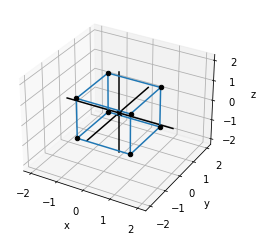

In [5]:
draw3d(Points3D(*cords), *seg3ds)

In [6]:
from math import sin, cos, pi
from vectors import *
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]
runningSum = (0, 0, 0)
ttts = []
for v in vs:
    newV = add(v, runningSum)
    ttts.append((newV, runningSum))
    runningSum = newV
ttts

[((0.0, 1.0, 0.3333333333333333), (0, 0, 0)),
 ((0.49999999999999994, 1.8660254037844388, 0.6666666666666666),
  (0.0, 1.0, 0.3333333333333333)),
 ((1.3660254037844386, 2.366025403784439, 1.0),
  (0.49999999999999994, 1.8660254037844388, 0.6666666666666666)),
 ((2.3660254037844384, 2.366025403784439, 1.3333333333333333),
  (1.3660254037844386, 2.366025403784439, 1.0)),
 ((3.232050807568877, 1.866025403784439, 1.6666666666666665),
  (2.3660254037844384, 2.366025403784439, 1.3333333333333333)),
 ((3.732050807568877, 1.0000000000000004, 1.9999999999999998),
  (3.232050807568877, 1.866025403784439, 1.6666666666666665)),
 ((3.732050807568877, 4.440892098500626e-16, 2.333333333333333),
  (3.732050807568877, 1.0000000000000004, 1.9999999999999998)),
 ((3.2320508075688776, -0.8660254037844384, 2.6666666666666665),
  (3.732050807568877, 4.440892098500626e-16, 2.333333333333333)),
 ((2.3660254037844393, -1.3660254037844388, 3.0),
  (3.2320508075688776, -0.8660254037844384, 2.6666666666666665)),


D:\Github\Math-for-Programmers\Chapter 03\draw3d.py:19: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


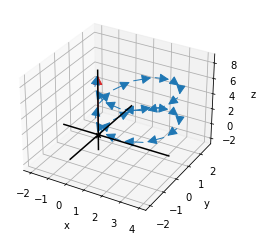

In [7]:
arrows = [Arrow3D(*t, color=blue) for t in ttts]
sumArrow = Arrow3D(ttts[len(ttts)-1][0], color=red)
draw3d(sumArrow, *arrows)

In [8]:
def find_vector_with_whole_number_len(max_coord = 100):
    for x in range(1, max_coord + 1):
        for y in range(1, x + 1):
            for z in range(1, y + 1):
                v_len = length((x, y, z))
                if (v_len.is_integer()):
                    yield (x, y, z, v_len)

In [9]:
f = find_vector_with_whole_number_len()

In [10]:
next(f)

(2, 2, 1, 3.0)

In [11]:
from math import atan
print(atan(4/3) - atan(3/4))

0.2837941092083278


In [12]:
var = [1, -1]
octahedron_points = [(a, 0, 0) for a in var] + [(0, b, 0) for b in var] + [(0, 0, c) for c in var]
octahedron_points

[(1, 0, 0), (-1, 0, 0), (0, 1, 0), (0, -1, 0), (0, 0, 1), (0, 0, -1)]

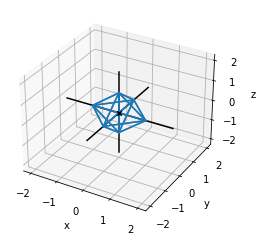

In [13]:
from draw3d import *
octahedron_edges = [Segment3D(sp, ep) for sp in octahedron_points for ep in octahedron_points if ep != sp]
draw3d(*octahedron_edges)

In [14]:
octahedron = [[(a, 0, 0), (0, b, 0), (0, 0, c)]
              if cross((a, 0, 0), (0, b, 0)) == (0, 0, c)
              else [(a, 0, 0), (0, 0, c), (0, b, 0)]
              for a in var for b in var for c in var]
octahedron

[[(1, 0, 0), (0, 1, 0), (0, 0, 1)],
 [(1, 0, 0), (0, 0, -1), (0, 1, 0)],
 [(1, 0, 0), (0, 0, 1), (0, -1, 0)],
 [(1, 0, 0), (0, -1, 0), (0, 0, -1)],
 [(-1, 0, 0), (0, 0, 1), (0, 1, 0)],
 [(-1, 0, 0), (0, 1, 0), (0, 0, -1)],
 [(-1, 0, 0), (0, -1, 0), (0, 0, 1)],
 [(-1, 0, 0), (0, 0, -1), (0, -1, 0)]]

In [15]:
def vertices(faces):
    return list(set([vertex for face in faces for vertex in face]))


In [16]:
def component(v,direction):
    return (dot(v,direction) / length(direction))

In [17]:
def vector_to_2d(v):
    return (component(v,(1,0,0)), component(v,(0,1,0)))

In [18]:
def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

In [19]:
blues = matplotlib.cm.get_cmap('Blues')

In [20]:
def unit(v):
    return scale(1./length(v), v)

In [21]:
def normal(face):
    return(cross(subtract(face[1 ], face[0 ]), subtract(face[2 ], face[0 ])))

In [22]:
from draw2d import *
def render(faces, light=(1,2,3), color_map=blues, lines=None):
    polygons = []
    for face in faces:
        unit_normal = unit(normal(face))
        if unit_normal[2] > 0 :
            c = color_map(1 - dot(unit(normal(face)), 
                          unit(light)))
            p = Polygon2D(*face_to_2d(face), 
                          fill=c, color=lines)
            polygons.append(p)
    draw2d(*polygons,axes=False, origin=False, grid=None)

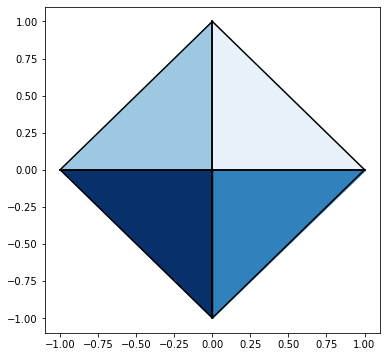

In [23]:
render(octahedron, color_map=matplotlib.cm.get_cmap('Blues'), lines=black)

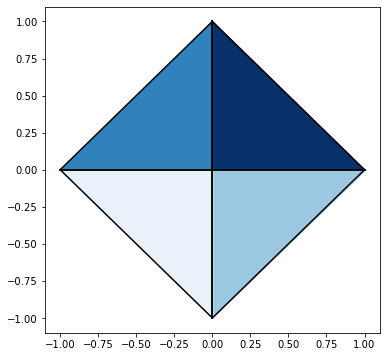

In [24]:
render(octahedron, color_map=matplotlib.cm.get_cmap('Blues'), lines=black, light=(-1, -2, 3))

In [25]:
color_map = matplotlib.cm.get_cmap('Greys')
c = color_map(0)
c

(1.0, 1.0, 1.0, 1.0)

In [26]:
c = color_map(255)
c

(0.0, 0.0, 0.0, 1.0)

In [27]:
c = color_map(1.0)
c

(0.0, 0.0, 0.0, 1.0)